<a href="https://colab.research.google.com/github/ramapnd18/itbootcamp/blob/main/bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PERTEMUAN 1



# Business Understanding


Permasalahan yang ada dalam dataset ini yaitu terkait dengan penyebab kematian tertinggi di dunia itu diakibatkan oleh penyakit jantung. Mengecek kondisi jantung itu membutuhkan biaya yang sangat mahal. Oleh karena itu, deteksi dini sangat penting untuk melihat dan mencegah terkena penyakit jantung.

Jadi yang dapat membantu atau mengatasi permasalahan tersebut dapat dibantu dengan algoritma atau metode ML. Dengan memanfaatkan algoritma yang cocok untuk memprediksi penyakit tersebut

# Data Understanding

Dataset penyakit jantung memiliki 12 kolom dan 918 data. Variable yang ada pada dataset tersebut diantaranya:  

*   Age
*   Sex
*   ChestPainType
*   RestingBP
*   Cholesterol
*   FastingBS
* 	RestingECG
*  	MaxHR
* 	ExerciseAngina
*   Oldpeak
*   ST_Slope
* 	HeartDisease



# Import Library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IT BOOTCAMP/dataset/heart.csv')

## Baca Dataset


In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
df.iloc[77]

,77
Age,35
Sex,F
ChestPainType,ASY
RestingBP,140
Cholesterol,167
FastingBS,0
RestingECG,Normal
MaxHR,150
ExerciseAngina,N
Oldpeak,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#PERTEMUAN 2

# Exploratory Dat Analysis

## Corelation Variable

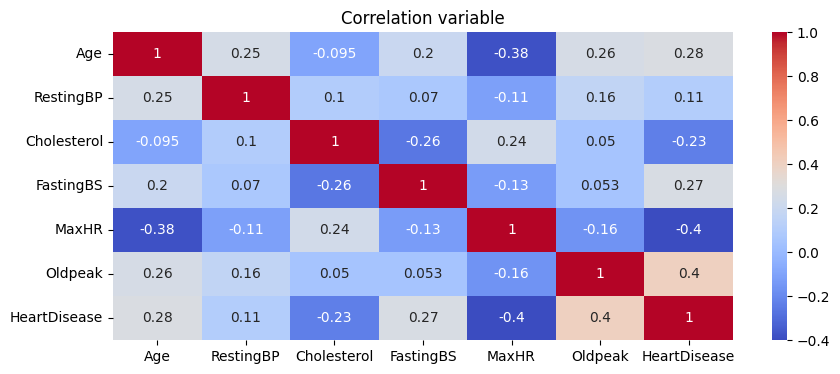

In [ ]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation variable')
plt.savefig('Correlation variable.png')



*   Age -> HeartDisease : (0.28), semakin tinggi atau semakin tua seseorang, kemungkinan besar terkena penyakit jantung

*   RestingBP -> HeartDisease : (0.11), semakin tinggi tekanan darah seseorang saat istirahat, kemungkinan besar terkena penyakit jantung

*   Cholesterol -> HeartDisease : (-0.23), semakin tinggi kadar kolesterol seseorang, maka kemungkinan terkena penyakit jantung

*   FastingBS -> HeartDisease : (0.27), semakin tinggi tekanan gula darah seseorang, kemungkinan besar organ tubuh manusia terkena efeknya (jantung)

*   MaxHR -> HeartDisease : (-0.4), semakin tinggi (naik) denyut jantung berarti baik atau normal dan jika denyut jantung melemah maka kemungkinan besar terkena penyakit jantung

*   Oldpeak -> HeartDisease : (0.4), semakin depresi seseorang meningkat atau berlebihan, maka akan mengganggu dari denyut jantungnya



## Data Distribution

### Visualisasi Variable Age vs HeartDisease

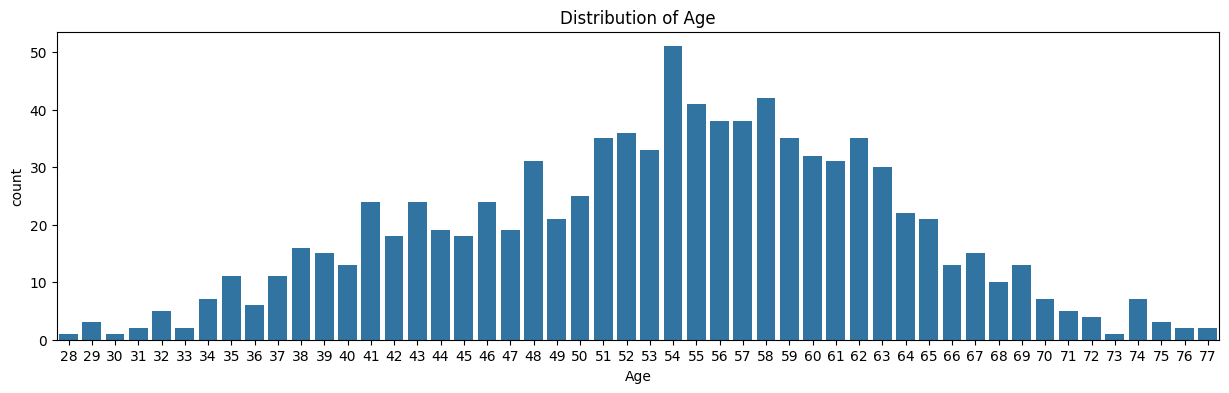

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(x='Age', data=df)
plt.title('Distribution of Age')
plt.savefig('Age.png')

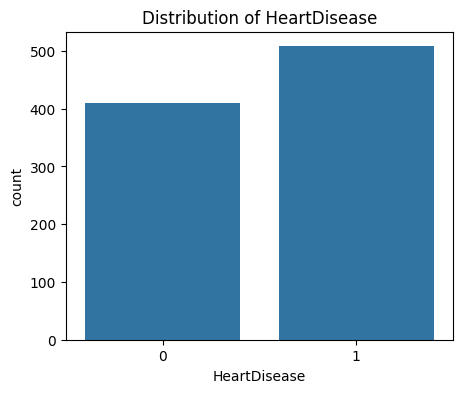

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of HeartDisease')
plt.savefig('HeartDisease.png')

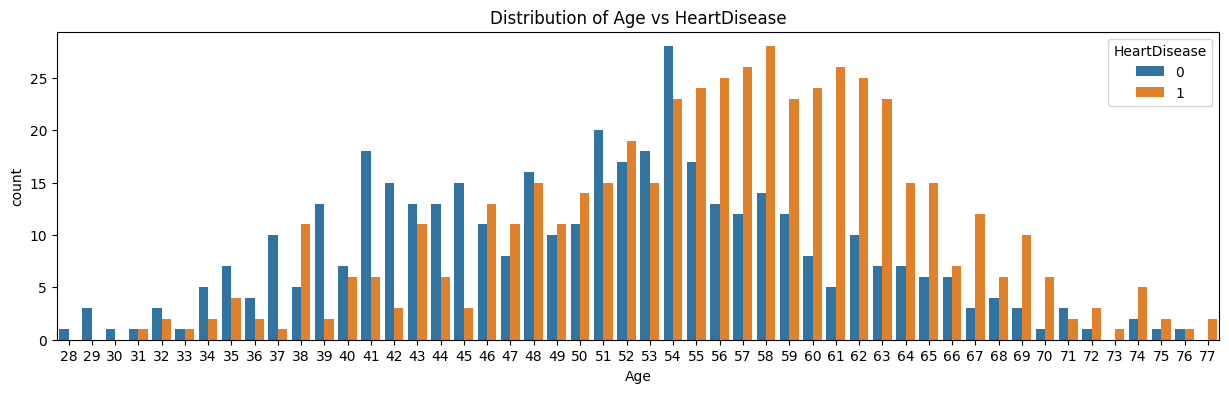

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(x='Age', hue='HeartDisease', data=df)
plt.title('Distribution of Age vs HeartDisease')
plt.savefig('Age vs HeartDisease.png')

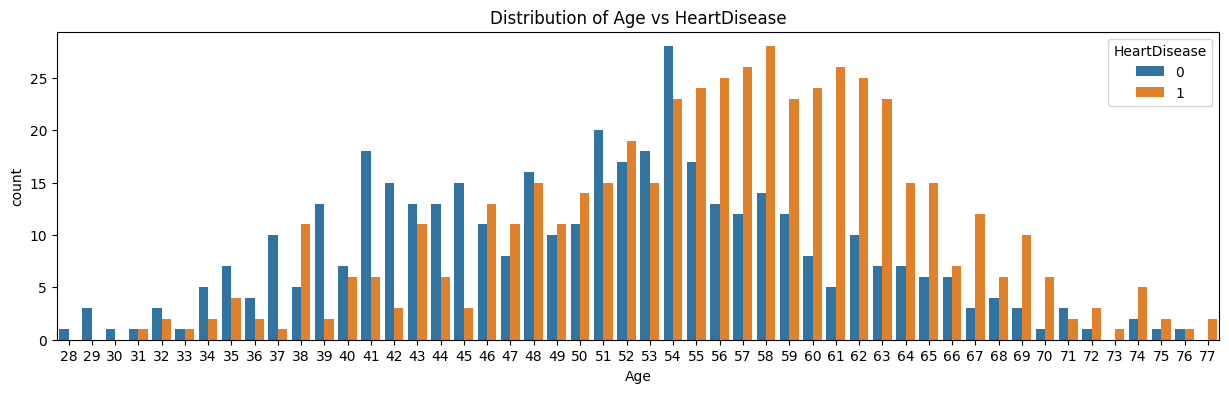

In [ ]:
numerical_cols = ['Age']
for col in numerical_cols:
    plt.figure(figsize=(15, 4))
    sns.countplot(x=col, hue='HeartDisease', data=df)
    plt.title(f'Distribution of {col} vs HeartDisease')
    plt.savefig(f'{col} vs HeartDisease.png')

Orang yang paling banyak terkena penyakit jantung paling bnayak pada usia 58 tahun, sedangkan paling sedikit pada usia 37 tahun. dari 28-30 tahun itu normal

### Visualisasi Variable Sex vs HeartDisease



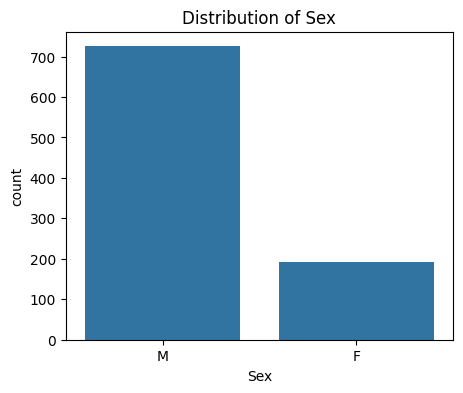

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Sex')
plt.savefig('Sex.png')

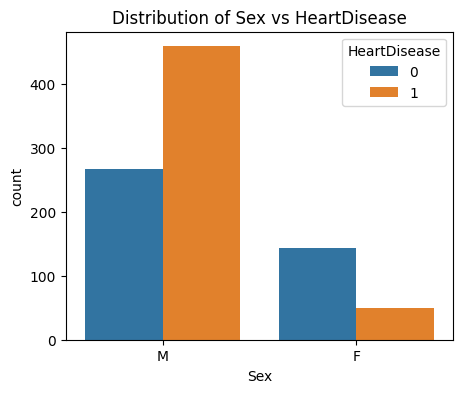

In [ ]:
Categorycal_cols = ['Sex']
for col in Categorycal_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=col, hue='HeartDisease', data=df)
    plt.title(f'Distribution of {col} vs HeartDisease')
    plt.savefig(f'{col} vs HeartDisease.png')

Pada Kasus ini, Laki-laki lebih rentan terkena penyakit jantung dibandingkan dengan perempuan

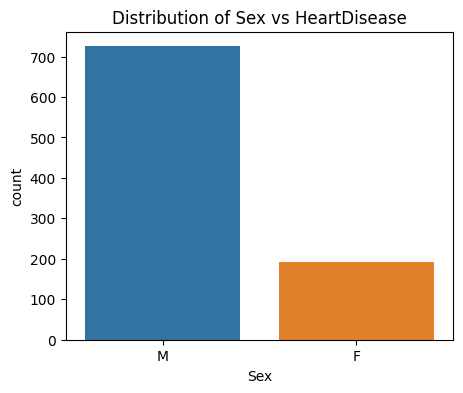

In [ ]:
Categorycal_cols = ['Sex']
for col in Categorycal_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=col, hue='Sex', data=df)
    plt.title(f'Distribution of {col} vs HeartDisease')
    plt.savefig(f'{col} vs HeartDisease.png')

### Visualisasi Variable ChestPainType vs HeartDisease

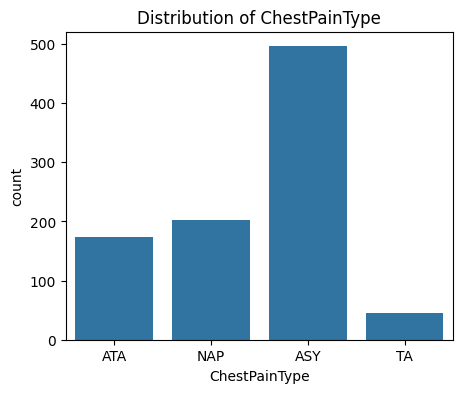

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='ChestPainType', data=df)
plt.title('Distribution of ChestPainType')
plt.savefig('ChestPainType.png')



*   ATA (Angina Atipikal)
*   NAP (Nyeri Non-angina)
*   ASY (Asimplomatik-nyeri tanpa gejala)
*   TA (Angina Tipikal)



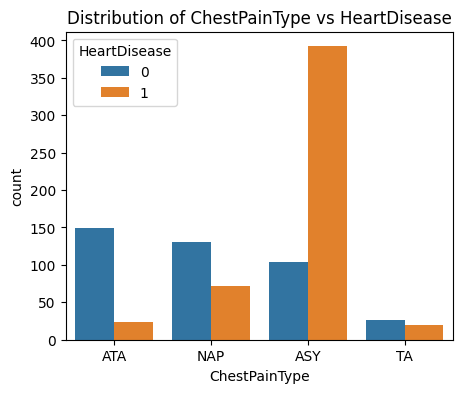

In [ ]:
Categorycal_cols = ['ChestPainType']
for col in Categorycal_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=col, hue='HeartDisease', data=df)
    plt.title(f'Distribution of {col} vs HeartDisease')
    plt.savefig(f'{col} vs HeartDisease.png')

Pada kasus ini veriable ChestPainType merupakan jenis nyeri dada, dapat disimpulkan bahwa jenis ASY (Asimplomatik atau tanpa gejala) lebih rentan terkena penyakit jantung, sedangakn paling sedikit yaitu jenis TA (Angina Tipikal)

### Visualisasi Variable FastingBS vs HeartDisease

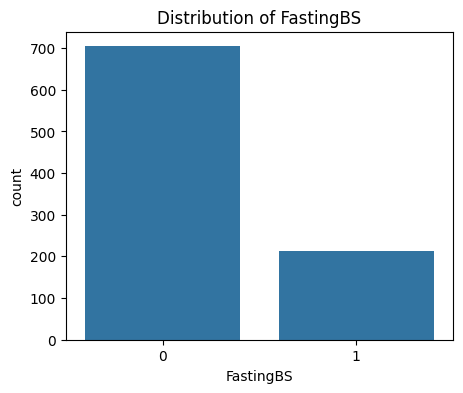

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='FastingBS', data=df)
plt.title('Distribution of FastingBS')
plt.savefig('FastingBS.png')

* 1 (tekanan Gula darah < 120 mg/dl)
* 0 (tekanan Gula darah > 120 mg/dl)

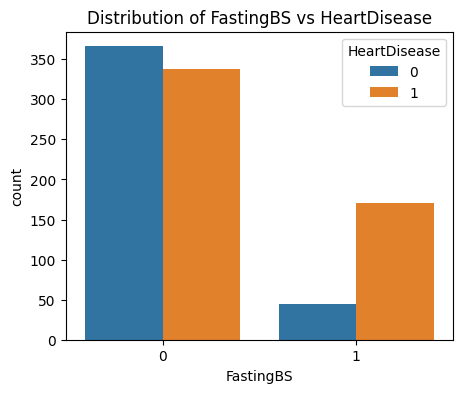

In [ ]:
Numerical_cols = ['FastingBS']
for col in Numerical_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=col, hue='HeartDisease', data=df)
    plt.title(f'Distribution of {col} vs HeartDisease')
    plt.savefig(f'{col} vs HeartDisease.png')

Dalam kasus ini Gula darah yang lebih dari 120 lebih rentan mengalami penyakit jantung dibandingkan dengan orang yang gula darahnya kurang dari 120, oleh karena itu orang yang gula darahnya lebih dari 120 harus lebih memperhatikan pola hidupnya

# Data Prepearation

## Dupliacate data


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
dt= df.drop_duplicates

## Missing Value

In [ ]:
missing_values = df.isnull().sum()
percentage_missing = (missing_values / len(df) * 100)
missing_data_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
    })
print(missing_data_info)

                Missing Values  Percentage Missing
Age                          0                 0.0
Sex                          0                 0.0
ChestPainType                0                 0.0
RestingBP                    0                 0.0
Cholesterol                  0                 0.0
FastingBS                    0                 0.0
RestingECG                   0                 0.0
MaxHR                        0                 0.0
ExerciseAngina               0                 0.0
Oldpeak                      0                 0.0
ST_Slope                     0                 0.0
HeartDisease                 0                 0.0


Jika persenan kecil boleh dihapus tidak akan mempengaruhi, Jika persenan besar Inputasi saja jangan hapus

In [ ]:
dt = df.dropna()

Imputasi typedata numerika mengguankan mean


In [ ]:
# df['variable']fillna(df['variable'].mean(), inplace=true)

Imputasi typedata categorical mengguankan modus

In [ ]:
# df['variable']fillna(df['variable'].mode(), inplace=true)

## Outlier

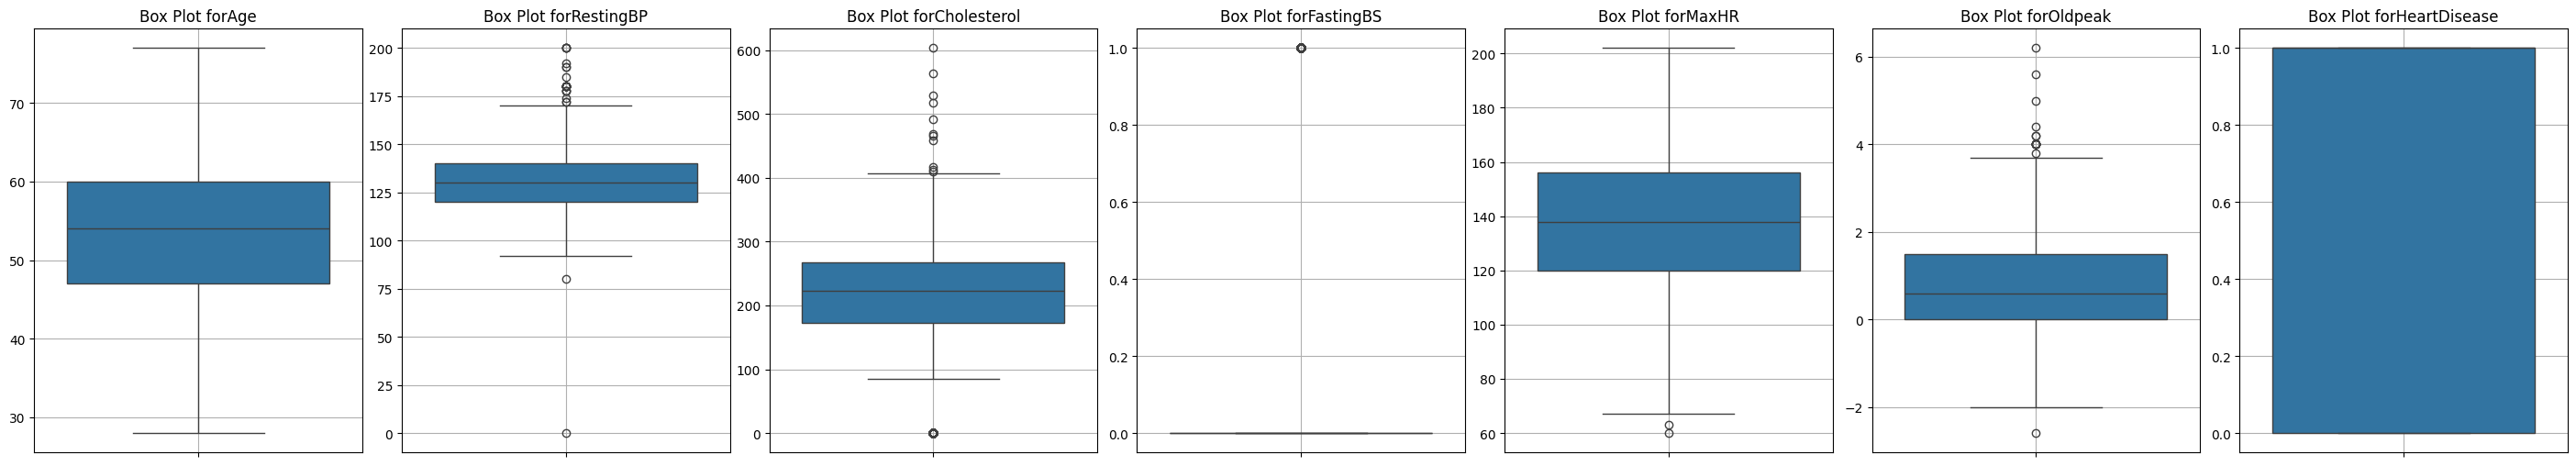

In [ ]:
numeric_column = df.select_dtypes(include=['int64', 'float64']).columns # mengambil column dengan type numerik
fig, axs = plt.subplots(ncols=len(numeric_column), figsize=(4 * len(numeric_column), 5))
# Membuat sebuah grid plots secara horizontal, dengan disesuaikan ukuran pada subplot

for i, column in enumerate(numeric_column):
    sns.boxplot(y=df[column], ax=axs[i], whis=1.5)
    axs[i].set_title(f'Box Plot for{column}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].grid(True)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)
plt.show()

In [ ]:
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

dt = df[
    (df['Cholesterol'] >= Q1 - 1.5 * IQR) &
    (df['Cholesterol'] <= Q3 + 1.5 * IQR)
    ]

# PERTEMUAN 3

#Preprosesing

## Encoding


In [ ]:
#1. Simpan salinan sebelun
df_before = df.copy()

In [ ]:
#2. Encoding
encoders = {}
for col in ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']:
  encoders[col] = LabelEncoder()
  df[col] = encoders[col].fit_transform(df[col])

In [ ]:
#3. Tampilan 5 baris pertama sebelum dan sesudah
print("Data sebelum encoding:")
print(df_before[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']].head())
print("\nData setelah encoding:")
print(df[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']].head())

Data sebelum encoding:
  Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0   M           ATA     Normal              N       Up
1   F           NAP     Normal              N     Flat
2   M           ATA         ST              N       Up
3   F           ASY     Normal              Y     Flat
4   M           NAP     Normal              N       Up

Data setelah encoding:
   Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
0    1              1           1               0         2
1    0              2           1               0         1
2    1              1           2               0         2
3    0              0           1               1         1
4    1              2           1               0         2


## Normalisasi Data


In [ ]:
# 4. Tentukan kolom numerik untuk penskalaan
numerik = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
print(df[numerik].describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR     Oldpeak
count  918.000000  918.000000   918.000000  918.000000  918.000000  918.000000
mean    53.510893  132.396514   198.799564    0.233115  136.809368    0.887364
std      9.432617   18.514154   109.384145    0.423046   25.460334    1.066570
min     28.000000    0.000000     0.000000    0.000000   60.000000   -2.600000
25%     47.000000  120.000000   173.250000    0.000000  120.000000    0.000000
50%     54.000000  130.000000   223.000000    0.000000  138.000000    0.600000
75%     60.000000  140.000000   267.000000    0.000000  156.000000    1.500000
max     77.000000  200.000000   603.000000    1.000000  202.000000    6.200000


In [ ]:
# 5. Membakukan fitur numerik
scaler = StandardScaler()
df[numerik] = scaler.fit_transform(df[numerik])
print(df[numerik].describe())

                Age     RestingBP  Cholesterol     FastingBS         MaxHR  \
count  9.180000e+02  9.180000e+02   918.000000  9.180000e+02  9.180000e+02   
mean  -1.083616e-16  1.954380e-16     0.000000 -3.096047e-17  4.953675e-16   
std    1.000545e+00  1.000545e+00     1.000545  1.000545e+00  1.000545e+00   
min   -2.706015e+00 -7.154995e+00    -1.818435 -5.513413e-01 -3.018469e+00   
25%   -6.906294e-01 -6.699346e-01    -0.233704 -5.513413e-01 -6.605778e-01   
50%    5.188098e-02 -1.295128e-01     0.221363 -5.513413e-01  4.678968e-02   
75%    6.883185e-01  4.109089e-01     0.623835 -5.513413e-01  7.541571e-01   
max    2.491558e+00  3.653439e+00     3.697252  1.813758e+00  2.561874e+00   

            Oldpeak  
count  9.180000e+02  
mean   1.238419e-16  
std    1.000545e+00  
min   -3.271482e+00  
25%   -8.324324e-01  
50%   -2.695748e-01  
75%    5.747115e-01  
max    4.983762e+00  


## Feature Enginering

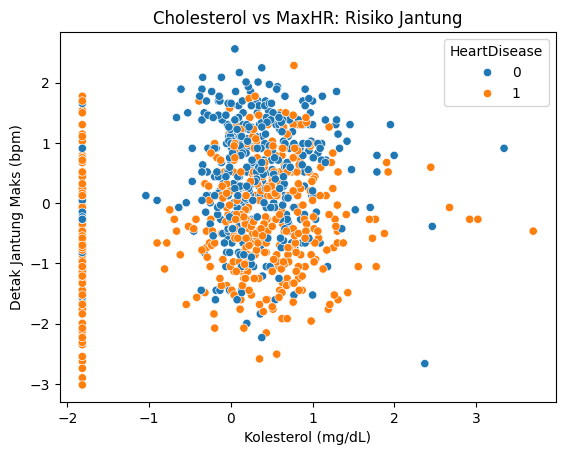

In [ ]:
df['Cholesterol_to_MaxHR'] = df['Cholesterol'] / df['MaxHR']
sns.scatterplot(x='Cholesterol', y='MaxHR', hue='HeartDisease', data=df)
plt.title('Cholesterol vs MaxHR: Risiko Jantung')
plt.xlabel('Kolesterol (mg/dL)')
plt.ylabel('Detak Jantung Maks (bpm)')
plt.savefig('cholesterol_maxhr_scatter.png')

## Hapus Kolom Cholesterol_to_MaxHR

In [ ]:
df = df.drop(columns=['Cholesterol_to_MaxHR'])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,-0.551341,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,-0.551341,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,-0.832432,2,0


## Pemisahan Data Fitur dan target

In [ ]:
#6. Fitur dan target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

#PERTEMUAN 4

#Modeling

## spling data

In [ ]:
# 6. Split data into trainiing and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the processed DataFrame
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,1,1,0.410909,0.825070,-0.551341,1,1.382928,0,-0.832432,2
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,0.105664,1
2,-1.751359,1,1,-0.129513,0.770188,-0.551341,2,-1.525138,0,-0.832432,2
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,0.574711,1
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,-0.832432,2


## Random Forest

In [ ]:
#Train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Prediksi

RandomForestClassifier(random_state=42)

##Logistic Regression

In [ ]:
#Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

#Prediksi

LogisticRegression(max_iter=1000, random_state=42)

##Evaluasi Model

In [ ]:
# Prediksi data uji dengan RandomForest
rf_y_pred = rf_model.predict(X_test)

# Prediksi data uji dengan LogisticRegression
lr_y_pred = lr_model.predict(X_test)

## Evaluasi Matrix RF

In [ ]:
# Evaluasi metrik untuk RandomForest
print("classification_report - Random Forest:")
print(classification_report(y_test, rf_y_pred, target_names=["No Disease", "Heart Disease"]))

# Akurasi untuk RandomForest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy RandomForest: {rf_accuracy:.4f}")

classification_report - Random Forest:
               precision    recall  f1-score   support

   No Disease       0.86      0.86      0.86        77
Heart Disease       0.90      0.90      0.90       107

     accuracy                           0.88       184
    macro avg       0.88      0.88      0.88       184
 weighted avg       0.88      0.88      0.88       184

Akurasi Random Forest: 0.8804


Evaluasi Matrix LR

In [ ]:
# Evaluasi metrik untuk LogisticRegression
print("classification_report - Random Forest:")
print(classification_report(y_test, lr_y_pred, target_names=["No Disease", "Heart Disease"]))

# Akurasi untuk LogisticRegression
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Accuracy LogisticRegression: {lr_accuracy:.4f}")

classification_report - Random Forest:
               precision    recall  f1-score   support

   No Disease       0.77      0.88      0.82        77
Heart Disease       0.91      0.81      0.86       107

     accuracy                           0.84       184
    macro avg       0.84      0.85      0.84       184
 weighted avg       0.85      0.84      0.84       184

Accuracy LogisticRegression: 0.8424


In [ ]:
# 7. Input data uji manual (simulasi pasien)
pasien = {
  'Age': 40,
  'Sex': 'M',
  'ChestPainType': 'ATA',
  'RestingBP': 140,
  'Cholesterol': 289,
  'FastingBS': 0,
  'RestingECG': 'Normal',
  'MaxHR': 172,
  'ExerciseAngina': 'N',
  'Oldpeak': 0.0,
  'ST_Slope': 'Up'
  }

# 8. Buat DataFrame satu baris
df_pasien = pd.DataFrame([pasien])

# 9. Encode seperti sebelumnya
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
  df_pasien[col] = encoders[col].transform(df_pasien[col])

# 10. Standarisasi numerik
df_pasien[numerik] = scaler.transform(df_pasien[numerik])

# 11. Prediksi dengan probabilitas untuk RandomForest
rf_proba = rf_model.predict_proba(df_pasien)[0]
rf_prediksi = rf_model.predict(df_pasien)[0]

# 12. Tampilkan hasil untuk RandomForest
print("Hasil Prediksi RandomForest:")
print(f"{'Berisiko' if rf_prediksi == 1 else 'Tidak Berisiko'} Penyakit Jantung")
print(f"Probabilitas Tidak Berisiko (0): {rf_proba[0]:.2f}")
print(f"Probabilitas Berisiko (1): {rf_proba[1]:.2f}")

# 13. Prediksi dengan probabilitas untuk LogisticRegression
lr_proba = lr_model.predict_proba(df_pasien)[0]
lr_prediksi = lr_model.predict(df_pasien)[0]

# 14. Tampilkan hasil untuk LogisticRegression
print("\nHasil Prediksi LogisticRegression:")
print(f"{'Berisiko' if lr_prediksi == 1 else 'Tidak Berisiko'} Penyakit Jantung")
print(f"Probabilitas Tidak Berisiko (0): {lr_proba[0]:.2f}")
print(f"Probabilitas Berisiko (1): {lr_proba[1]:.2f}")

Hasil Prediksi RandomForest:
Tidak Berisiko Penyakit Jantung
Probabilitas Tidak Berisiko (0): 1.00
Probabilitas Berisiko (1): 0.00

Hasil Prediksi LogisticRegression:
Tidak Berisiko Penyakit Jantung
Probabilitas Tidak Berisiko (0): 0.92
Probabilitas Berisiko (1): 0.08


In [ ]:
# Menyimpan model dan preprocessor
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))
# pickle.dump(lr_model, open('lr_model.pkl', 'wb'))
pickle.dump(encoders, open('encoders.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))